<a href="https://colab.research.google.com/github/mikku-droid/Projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K** **Means** Clustering

In [ ]:
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_blobs
 import pandas as pd
 import numpy as np
 %matplotlib inline

In [ ]:
X,Y=make_blobs(n_samples=1000,centers=5,n_features=2,random_state=23)

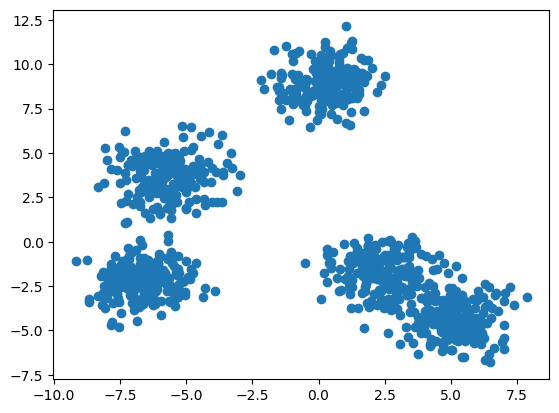

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=23)

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss=[]
for k in range(1,11):
  model=KMeans(n_clusters=k,init='k-means++')
  model.fit(X)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

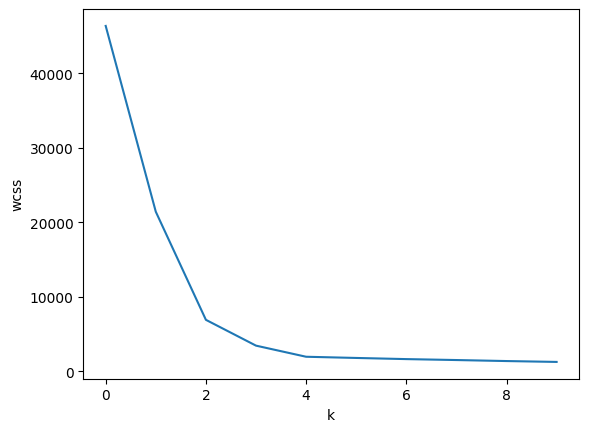

In [ ]:
plt.plot(wcss)
plt.xlabel('k')
plt.ylabel('wcss')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


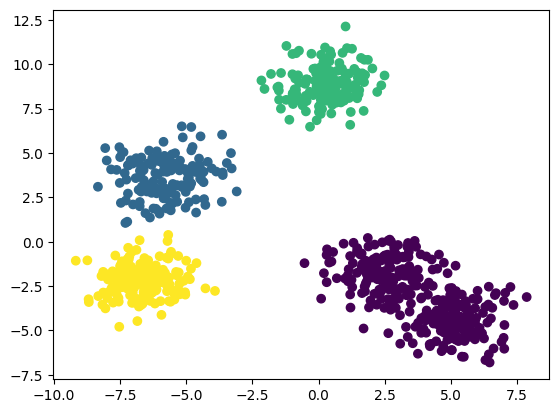

In [ ]:
fin_model=KMeans(n_clusters=4,init='k-means++')
y_label=fin_model.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [ ]:
y_test_labels=fin_model.predict(X_test)

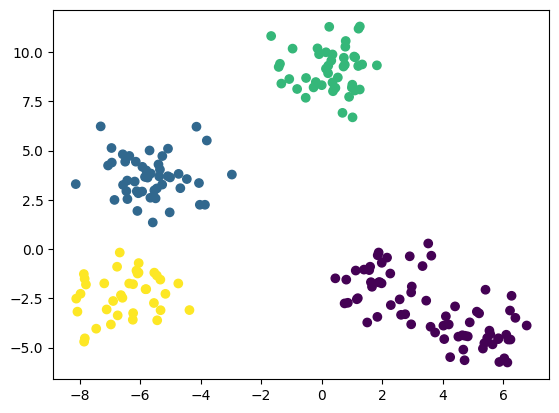

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

**Hierarchial Clustering**

In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
iris_data=pd.DataFrame(iris.data)

In [ ]:
iris_data.columns=iris.feature_names


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
X_scaled=scaler.fit_transform(iris_data)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)


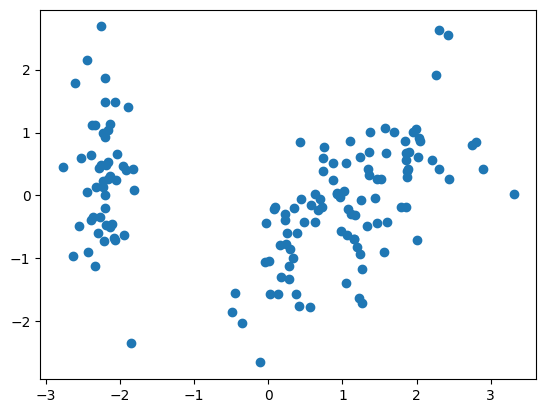

In [ ]:
pca_scaled=pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])


Text(0, 0.5, 'Eucledian Distance')

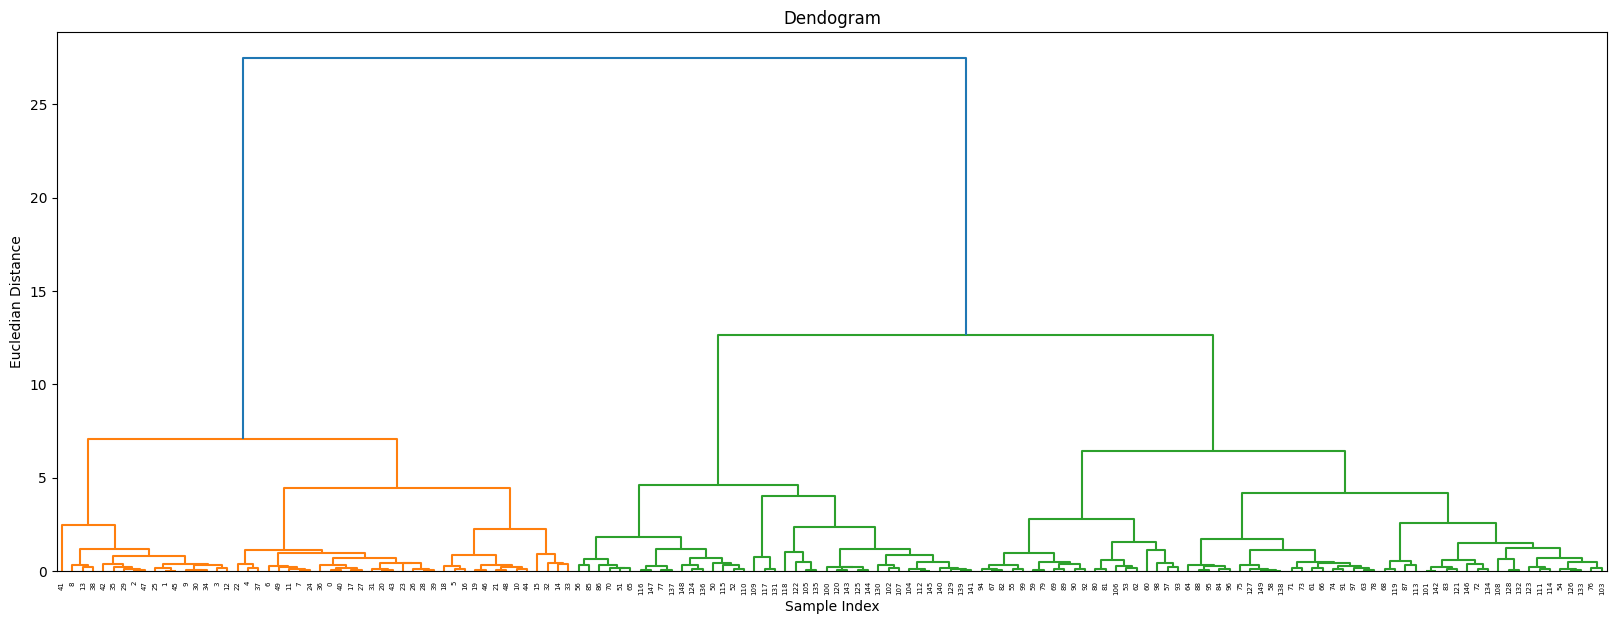

In [ ]:
import  scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

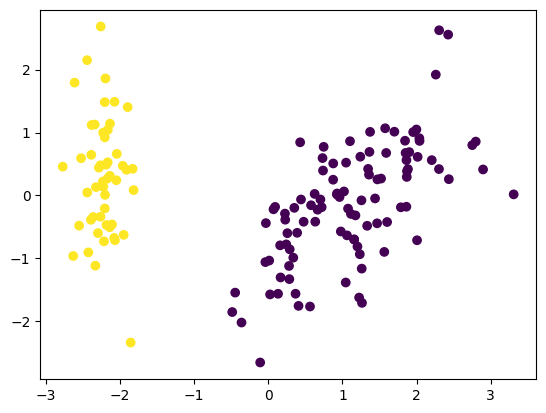

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

**DBScan**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
X,Y=make_moons(n_samples=250,noise=0.05)


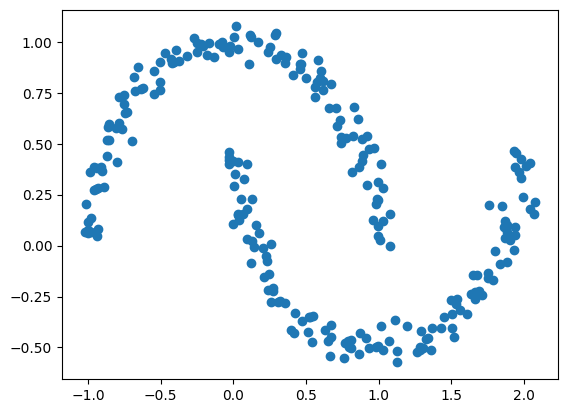

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
X_scaled=scaler.fit_transform(X)

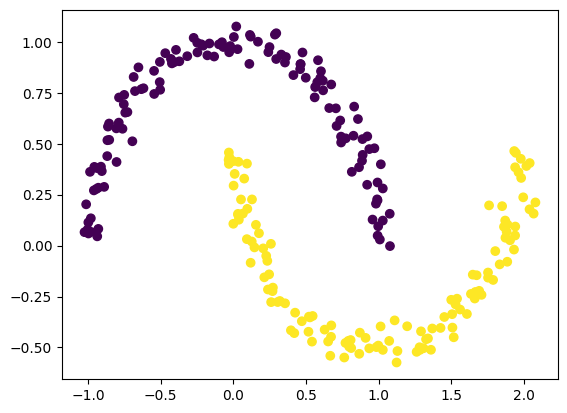

In [ ]:
dbcan=DBSCAN(eps=0.5)
dbcan.fit(X_scaled)
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)


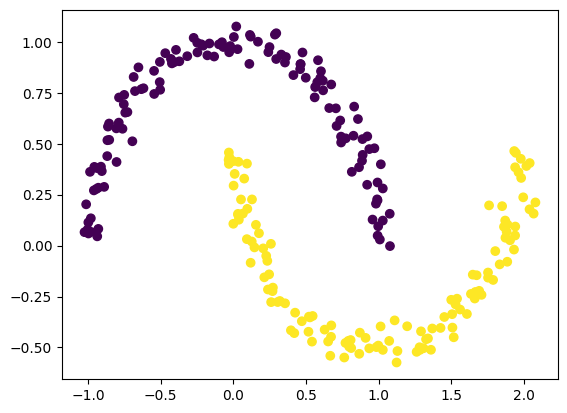

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)